# Case 1
## Import data

In [1]:
%run setup.py
mdates.set_epoch('2025-01-01')
from import_data import get_data


In [2]:
filenames = [
    '../fictitious-case-studies/case1/case1.sqlite',
    '../fictitious-case-studies/case1/no-behav.sqlite',
    '../fictitious-case-studies/case1/case1-no-ff-export.sqlite',
    '../fictitious-case-studies/case1/one-month-timestep-no-ff-export.sqlite',
    '../fictitious-case-studies/case1/no-behav-no-ff-export.sqlite',
]

# list all unphysical commodities that should be ignored
ignore_commods = ['fluorine', 'oxygen', 'extra_fluorine', 'extra_oxygen', 'silica']

In [3]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file, ignore_commods)
    
    print(name)
    
    data[name] = file_data

if len(data.keys()) == 1:
    data = data[list(data.keys())[0]]

case1
no-behav
case1-no-ff-export
one-month-timestep-no-ff-export
no-behav-no-ff-export


### Fix dates for file that uses one month rather than one day timesteps

In [21]:
data['one-month-timestep-no-ff-export']['transactions'].drop(columns=['Date', 'SSCumQuantityReceived', 'SSCumQuantitySent'])
data['one-month-timestep-no-ff-export']['transactions']['Date'] = mdates.num2date(data['one-month-timestep-no-ff-export']['transactions']['Time']*30)
startup = 25
data['one-month-timestep-no-ff-export']['transactions']['SSCumQuantityReceived'] = data['one-month-timestep-no-ff-export']['transactions'].sort_values(by=['Date']).loc[data['one-month-timestep-no-ff-export']['transactions']['Time'] >= startup].groupby(by='ReceiverId')['Quantity'].cumsum()
data['one-month-timestep-no-ff-export']['transactions']['SSCumQuantitySent'] = data['one-month-timestep-no-ff-export']['transactions'].sort_values(by=['Date']).loc[data['one-month-timestep-no-ff-export']['transactions']['Time'] >= startup].groupby(by='SenderId')['Quantity'].cumsum()


### Facility shorthand

In [26]:
conv_fac = []

enr_fac = ['EnrichmentReceiver',
           'EnrichmentSeparation',
           'Enrichment',
           'EnrichmentRecipeRequester',
           'EnrichmentMixer',
           'EnrichmentShipper']

enr_tails_fac = [
    'EnrichmentTailsMixer',
    'EnrichmentTailsPackager',
    'EnrichmentTailsStorage']

ff_fac = [
    'FuelFabReceiver',
    'FuelFabSeparation',
    'FuelFabMixer',
    'FuelFabShipper',
    'HALEUFuelFabReceiver',
    'HALEUFuelFabSeparation',
    'HALEUFuelFabMixer',
    'HALEUFuelFabShipper']

rx_A = [
    'RxA1Storage',
    'RxA2Storage',
    'RxA3Storage',
    'RxA4Storage',
    'RxAShipper']

rx_B = [
    'RxB1Reactor',
    'RxB2Reactor',
    'RxB3FreshFuelVault',
    'RxB3Reactor',
    'RxB4FreshFuelVault',
    'RxB4Reactor',
    'RxBBlueSpentFuelPool',
    'RxBRedSpentFuelPool']

rx_C = [
    'RxC1FreshFuelVault',
    'RxC1Reactor',
    'RxC2FreshFuelVault',
    'RxC2Reactor',
    'RxC3FreshFuelVault',
    'RxC3Reactor',
    'RxC4FreshFuelVault',
    'RxC4Reactor',
    'RxCBlueSpentFuelPool',
    'RxCRedSpentFuelPool',
    'RxCShipper']

rx_D = [
    'RxD1FreshFuelVault',
    'RxD1Reactor',
    'RxD2FreshFuelVault',
    'RxD2Reactor',
    'RxD3FreshFuelVault',
    'RxD3Reactor',
    'RxD4FreshFuelVault',
    'RxD4Reactor',
    'RxDBlueSpentFuelPool',
    'RxDRedSpentFuelPool',
    'RxDShipper']
   

# Plots
## Size of packages and transport units from enrichment shipper

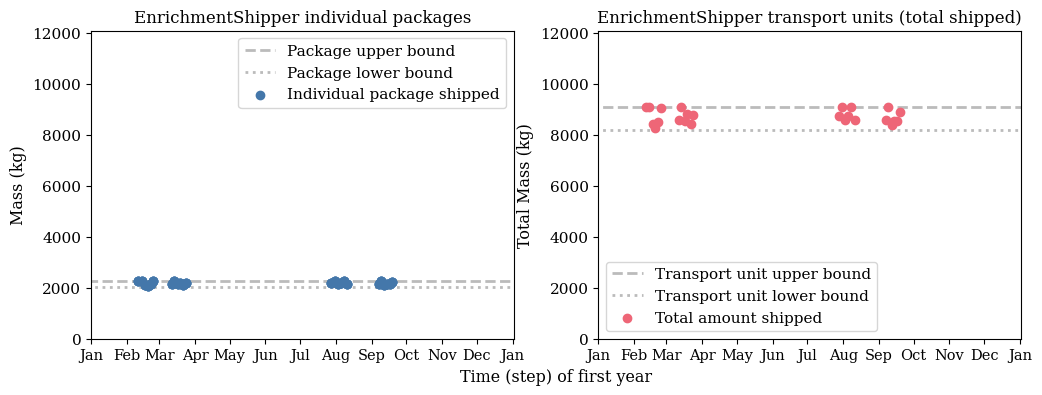

In [28]:
df = data['case1']['transactions'].loc[data['case1']['transactions']['SenderPrototype'] == enr_fac[-1]]

fig = plt.figure(figsize = (12, 4))
# fig = plt.figure(figsize = (12, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step) of first year')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(121)

ax0.hlines(y=2277,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dashed', label='Package upper bound', zorder=0)
ax0.hlines(y=2049.30,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dotted', label='Package lower bound', zorder=0)

# ax0.hlines(y=293.84,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dashdot', label='Export demand limited', zorder=0)

end_startup = 730
ax0.set_xlim([end_startup,end_startup+366])
ax0.set_ylim([0,12100])
ax0.set_ylabel('Mass (kg)')

ax0.scatter(df['Time'],
         df['Quantity'],
         color= palette[0],
           label="Individual package shipped")
ax0.set_title(enr_fac[5] + " individual packages")

ax0.xaxis.set_major_locator(mdates.MonthLocator())
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax0.legend()

ax1 = fig.add_subplot(122, sharex=ax0)

ax1.hlines(y=9108,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dashed', label='Transport unit upper bound', zorder=0)
ax1.hlines(y=8197.2,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dotted', label='Transport unit lower bound', zorder=0)

# ax1.set_xlim([00,365])
ax1.set_ylim([0,12100])
ax1.set_ylabel('Total Mass (kg)')

ax1.scatter(df.groupby(by=['Time'])['Quantity'].sum().reset_index()['Time'],
         df.groupby(by=['Time'])['Quantity'].sum().reset_index()['Quantity'],
         color= palette[1],
           label="Total amount shipped")
ax1.set_title(enr_fac[5] + " transport units (total shipped)")

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax1.legend()


## Cumulative shipments of fresh fuel

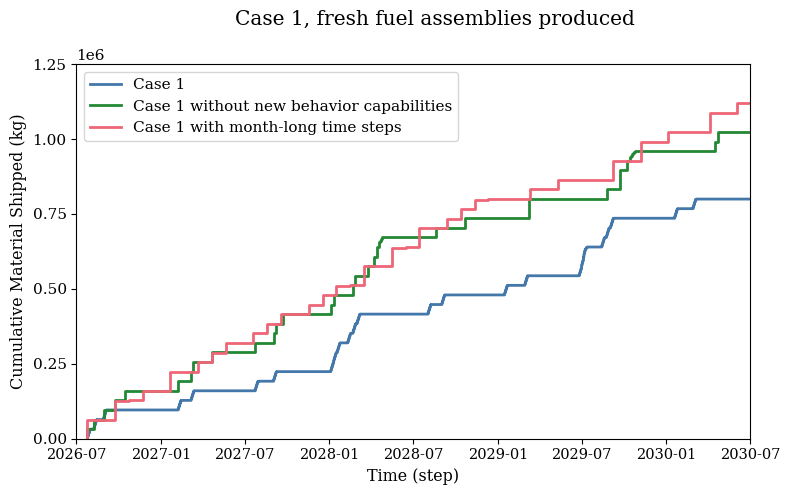

In [27]:
c1 = data['case1-no-ff-export']['transactions'].loc[data['case1-no-ff-export']['transactions']['SenderPrototype'] == ff_fac[3]]
om = data['one-month-timestep-no-ff-export']['transactions'].loc[data['one-month-timestep-no-ff-export']['transactions']['SenderPrototype'] == ff_fac[3]]
nobhv = data['no-behav-no-ff-export']['transactions'].loc[data['no-behav-no-ff-export']['transactions']['SenderPrototype'] == ff_fac[3]]


fig = plt.figure(figsize = (8, 5))
# fig = plt.figure(figsize = (12, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

###

ax0 = fig.add_subplot(111)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
ss_start = 546
ax0.set_xlim([ss_start,ss_start+(4)*365+1])
# ax0.set_xticks(np.arange(0, 50, 7))
maxy=1.25e6
ax0.set_ylim([0,maxy])
ax0.set_yticks(np.arange(0, maxy+1, maxy/5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax0.step(c1['Date'],
         c1['Quantity'].cumsum(),
         color= palette[0],
        label='Case 1',
        where='post')

###

ax0.step(nobhv['Date'],
         nobhv['Quantity'].cumsum(),
         color= palette[2],
         label='Case 1 without new behavior capabilities',
        where='post')
ax0.vlines(x=nobhv.loc[nobhv['CumQuantitySent'] > 0].iloc[0]['Date'],ymin=0,
           ymax=nobhv.loc[nobhv['CumQuantitySent'] > 0].iloc[0]['CumQuantitySent'], color=palette[2])

###

ax0.step(om['Date'],
         om['Quantity'].cumsum(),
         color= palette[1],
         label='Case 1 with month-long time steps',
        where='post')
ax0.vlines(x=om.loc[om['CumQuantitySent'] > 0].iloc[0]['Date'],ymin=0,ymax=om.loc[om['CumQuantitySent'] > 0].iloc[0]['CumQuantitySent'], color=palette[1])


ax0.set_ylabel('Cumulative Material Shipped (kg)')

fig.suptitle('Case 1, fresh fuel assemblies produced', x=0.55)
fig.tight_layout()
ax0.legend()

plt.savefig('plots/c1_demo_comparison', transparent=True)

## Size of shipments from fuel assemblies to a reactor

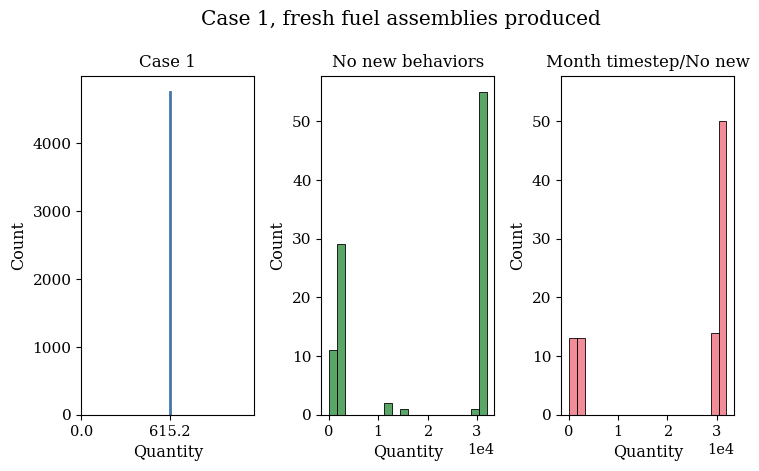

In [23]:
fig = plt.figure(figsize = (8, 5))
# fig = plt.figure(figsize = (12, 8))

ax = fig.add_subplot(111)
# ax.set_xlabel('Time (step)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

###

ax0 = fig.add_subplot(131)

sns.histplot(c1['Quantity'],
         color= palette[0],
        label='Case 1',
        ax=ax0,
            kde=True)
ax0.set_title('Case 1')

ax0.set_xlim([0,1200])
ax0.set_xticks(np.arange(0, 1201, 615.2))

###
ax2 = fig.add_subplot(132)
sns.histplot(nobhv['Quantity'],
         color= palette[2],
         label='Case 1 without new behavior capabilities',
        ax=ax2,
            bins=20)
ax2.set_title('No new behaviors')
ax2.set_xticks(np.arange(0, 30001, 10000))
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

###
ax1 = fig.add_subplot(133, sharey=ax2)
sns.histplot(om['Quantity'],
         color= palette[1],
         label='Case 1 with month-long time steps',
        ax=ax1,
            bins=20)
ax1.set_title('Month timestep/No new')
ax1.set_xticks(np.arange(0, 30001, 10000))
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

fig.suptitle('Case 1, fresh fuel assemblies produced', x=0.55)
fig.tight_layout()
# ax0.legend()

plt.savefig('plots/c1_demo_comparison_hist', transparent=True)


## Current inventory in fresh fuel vault

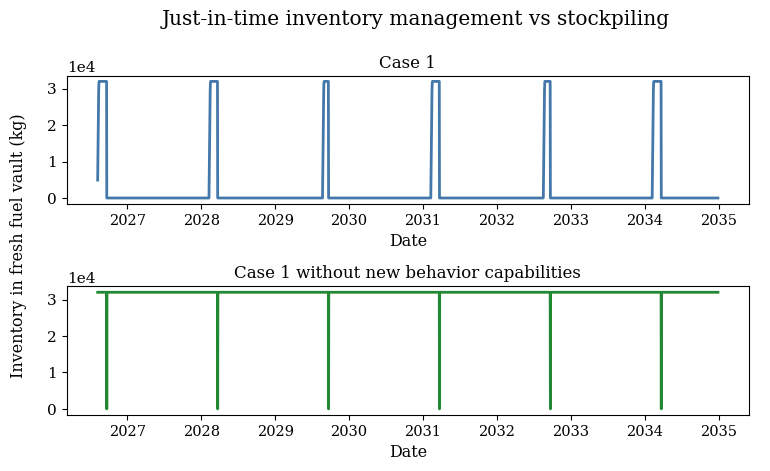

In [24]:
c1 = data['case1-no-ff-export']['ei'].loc[
    data['case1-no-ff-export']['ei']['AgentId'] == data['case1-no-ff-export']['agents'].loc[data['case1-no-ff-export']['agents']['Prototype'] == rx_B[4]]['AgentId'].iloc[0]
].groupby('Time')['Quantity'].sum().reset_index()
c1['Date'] = mdates.num2date(c1['Time'])

nobhv = data['no-behav-no-ff-export']['ei'].loc[
    data['no-behav-no-ff-export']['ei']['AgentId'] == data['no-behav-no-ff-export']['agents'].loc[data['no-behav-no-ff-export']['agents']['Prototype'] == rx_B[4]]['AgentId'].iloc[0]
].groupby('Time')['Quantity'].sum().reset_index()
nobhv['Date'] = mdates.num2date(nobhv['Time'])

fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

###

ax0 = fig.add_subplot(211)

sns.lineplot(x=c1['Date'],
             y=c1['Quantity'],
             color= palette[0],
             ax=ax0)

###

ax0.set_title('Case 1')
# ax0.set_xlabel('Date')
ax0.set_ylabel('')
ax0.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

sns.lineplot(x=nobhv['Date'],
             y=nobhv['Quantity'],
             color= palette[2],
             ax=ax1)

ax1.set_title('Case 1 without new behavior capabilities')
ax1.set_ylabel('')

ax.set_ylabel('Inventory in fresh fuel vault (kg)')

fig.suptitle('Just-in-time inventory management vs stockpiling', x=0.55)

fig.tight_layout()

plt.savefig('plots/c1_demo_comparison_FFV', transparent=True)

## Materials shipped from enrichment shipper

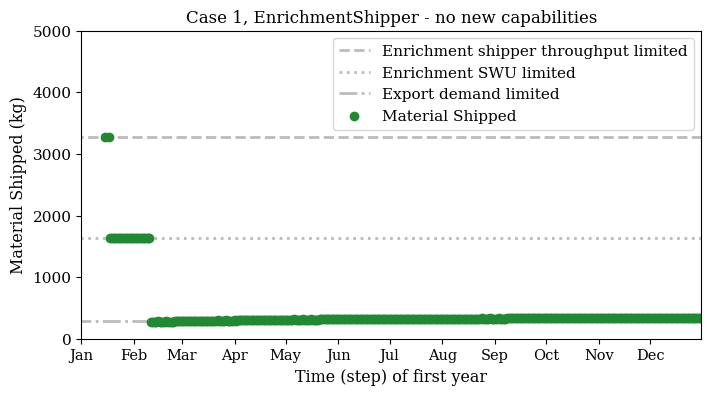

In [25]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step) of first year')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(111)

ax0.hlines(y=3274.32,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dashed', label='Enrichment shipper throughput limited', zorder=0)
ax0.hlines(y=1637.63,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dotted', label='Enrichment SWU limited', zorder=0)
ax0.hlines(y=293.84,xmin=-5,xmax=3651, colors=palette[-2], linestyles='dashdot', label='Export demand limited', zorder=0)

ax0.set_xlim([0,364])
ax0.set_ylim([0,5000])
ax0.set_ylabel('Material Shipped (kg)')

ax0.xaxis.set_major_locator(mdates.MonthLocator())
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# ax0.xaxis.set_minor_locator(mdates.YearLocator(base=1))

ax0.scatter(data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderPrototype'] == 'EnrichmentShipper'] ['Date'],
         data['no-behav']['transactions'].loc[data['no-behav']['transactions']['SenderPrototype'] == 'EnrichmentShipper'] ['Quantity'],
         color= palette[2],
           label="Material Shipped")
ax0.set_title("Case 1, " + enr_fac[5] + " - no new capabilities")

plt.legend()


plt.savefig('plots/c1_no-behav-enrichment-shipper', transparent=True)